In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Projectile Motion with Drag Force and Head Wind

We begin by considering the forces on an object traveling through the air, under the influence of gravity and air resistance.

Step 1: Choose a Coordinate System and Origin

We will choose a coordinate system with $x$ pointing to the right and $y$ pointing upward, as usual.  The origin of the coordinate system will be such that $y=0$ will be at ground level, and $x=0$ will be coincident with the object at $t=0$.

Step 2:  Evaluate forces on the object

Gravity is, of course, in the vertical direction, pointing downward.  Thus we have that $F_g = -mg \hat{j}$.

The drag force is more complicated!  The physics here is that drag force opposes the $velocity$ vector.  We can express this as:

$$
F_{drag} = -k \vec{v}
$$

where $k$ is a constant that depends on the shape and density of the object, as well as the density of the air.  For simplicity, we will take $k=0.5$ in our calculations.  Incidentally, this is a linear drag force, which is a good approximation for low speeds.  At higher speeds, drag force is proportional to the square of the velocity, but we will not consider that case here.  If we wanted to actually eveluate $k$ for a real object, we would need to know the drag coefficient, cross-sectional area, and density of the air.  The formula for $k$ in that case is:

$$
k = \frac{1}{2} C_d \rho A
$$

where $C_d$ is the drag coefficient, $\rho$ is the density of the air, and $A$ is the cross-sectional area of the object.

To account for head wind, we will assume that the wind is blowing directly against the motion of the object.  This means that if the object is moving to the right, the wind is blowing to the left.  Thus, if the object has a velocity $\vec{v} = v_x \hat{i} + v_y \hat{j}$, then the drag force will be:

$$
F_{drag} = -k (v_x \hat{i} + v_y \hat{j}) - k v_{wind} \hat{i} = -k (v_x + v_{wind})\hat{i} - k v_y \hat{j}
$$



Step 3:  Write down the equations of motion

The total force on the object is then:

$$
\vec{F} = F_{drag} + F_g = -k \vec{v} -k v_{wind} \hat{i}- mg \hat{j}
$$

From Newton's Second Law, we have:

$$
\vec{a} = \frac{\vec{F}}{m} = -\frac{k}{m} \vec{v} - \frac{k}{m} v_{wind} \hat{i} -  g \hat{j}
$$

Resolving this into components, we have:

$$
a_x = -\frac{k}{m} (v_x + v_{wind})
$$

$$
a_y = -g - \frac{k}{m} v_y
$$

We will use $g=10$ m/s$^2$, $k=0.5$ kg/s, v_{wind} = 20 m/s, and $m=1.0$ kg in our calculations.

Thus, our equations of motion become:

$$
a_x = -10.0 - 0.5 v_x
$$

$$
a_y = -10.0 - 0.5 v_y
$$

Step 4:  Numerical Solution of the Equations of Motion

We will use the Euler Method to numerically solve the equations of motion.  We will define a time step $dt$, and then update the position and velocity of the object at each time step according to the following equations:

$$
x(t+dt) = x(t) + v_x(t) dt
$$

$$
y(t+dt) = y(t) + v_y(t) dt
$$

$$
v_x(t+dt) = v_x(t) + a_x(t) dt
$$

$$
v_y(t+dt) = v_y(t) + a_y(t) dt
$$





Angle = 30
Time of flight = 2.494450000007874
Range = 15.651973166631224
Angle = 30
Time of flight = 2.494470000001767
Range = 15.652002134696218
Angle = 30
Time of flight = 2.49460000000084
Range = 15.651696072732179
Angle = 30
Time of flight = 2.4950000000000006
Range = 15.652274660619007
Angle = 30
Time of flight = 2.495999999999836
Range = 15.6495971563934
Angle = 30
Time of flight = 2.499999999999969
Range = 15.655310738706243
Angle = 30
Time of flight = 2.5099999999999905
Range = 15.627912879275652
Angle = 30
Time of flight = 2.549999999999999
Range = 15.677769914526817
Angle = 30
Time of flight = 2.600000000000001
Range = 15.72781467553615


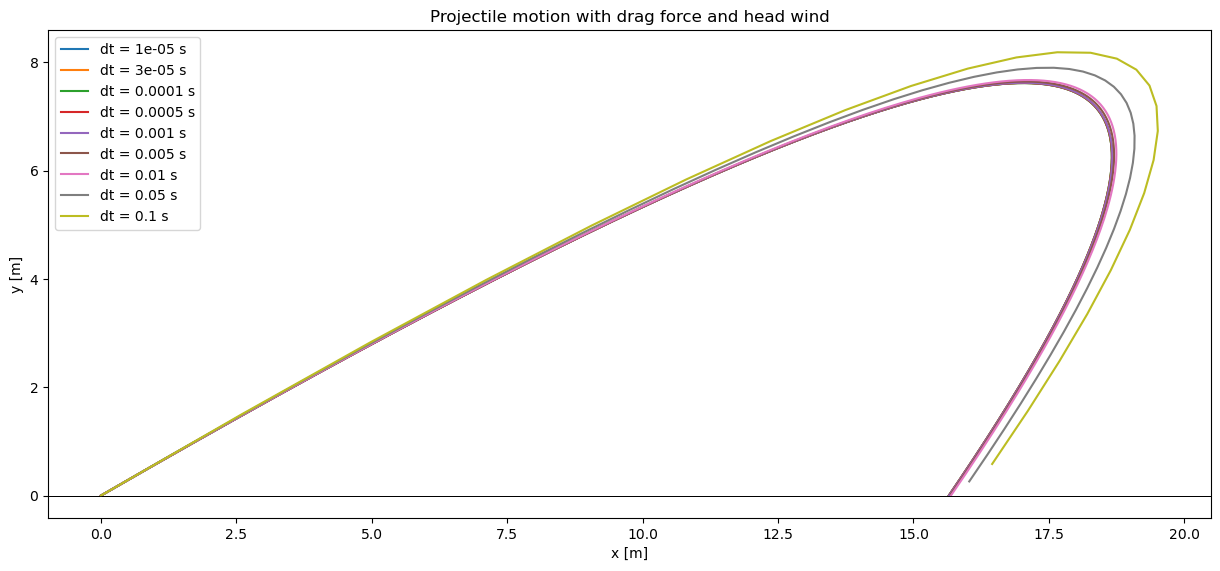

In [20]:
# Projectile motion with drag force and head wind

# Define the number of points
npts = 500000

#angles = [20]

choice = 2

angles = [30, 30, 30, 30, 30, 30, 30, 30, 30]
dt = [0.00001, 0.00003, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

fig, axis = plt.subplots(1, 1, figsize=(15,15))

for i in range(len(angles)):

    # Define the parameters
    mass = 1.0
    angle =angles[i]*np.pi/180.0
    v0 = 30.0
    g = 10.0
    v_wind = 20.0
    k = 0.5

    # Initialize the arrays
    time = np.zeros(npts)
    x = np.zeros(npts)
    y = np.zeros(npts)
    vx = np.zeros(npts)
    vy = np.zeros(npts)
    ax = np.zeros(npts)
    ay = np.zeros(npts)

    # Define the acceleration function
    def a(vx, vy):
        global g
        ax = -k/mass*v_wind - k/mass*vx
        ay = -g - k/mass*vy
        return ax, ay

    # Set the initial conditions
    time[0] = 0.0
    x[0] = 0.0
    y[0] = 0.0
    vx[0] = v0*np.cos(angle)
    vy[0] = v0*np.sin(angle)
    ax[0], ay[0] = a(vx[0], vy[0])

    # Loop over the time points, until the projectile hits the ground
    for t in range(1,npts):
        # Euler Method
    
        # update time
        time[t] = time[t-1] + dt[i]
    
        # update position
        x[t] = x[t-1] + vx[t-1]*dt[i]
        y[t] = y[t-1] + vy[t-1]*dt[i]
    
        # update velocity
        vx[t] = vx[t-1] + ax[t-1]*dt[i]
        vy[t] = vy[t-1] + ay[t-1]*dt[i]
    
        # update acceleration
        ax[t], ay[t] = a(vx[t], vy[t])
    
        # check if the projectile hits the ground
        if y[t] < 0.0:
            print('Angle =', angles[i])
            print('Time of flight =', time[t])
            print('Range =', x[t])
            break

    # Plot the results


    if (choice == 1):
        axis.plot(x[:t], y[:t], label='angle = '+str(angles[i])+' degrees')
    else:
        axis.plot(x[:t], y[:t], label='dt = '+str(dt[i])+' s')

    axis.set_aspect('equal')
    axis.set_xlabel('x [m]')
    axis.set_ylabel('y [m]')
    axis.set_title('Projectile motion with drag force and head wind')

    # draw horizontal line (ground)
    axis.axhline(0, color='black', lw=0.5)

axis.legend()
#axis.set_xlim(21.585,21.590)
#axis.set_ylim(0,0.02)
plt.show()

Angle = 10
Time of flight = 0.9646599999982446
Range = 18.62373837539326
Angle = 16
Time of flight = 1.4743200000011911
Range = 21.454412332127507
Angle = 17
Time of flight = 1.5548000000017184
Range = 21.527369093187367
Angle = 18
Time of flight = 1.6340500000022375
Range = 21.505318683097443
Angle = 20
Time of flight = 1.7889400000032523
Range = 21.199730581942795
Angle = 30
Time of flight = 2.494450000007874
Range = 15.651973166631224
Angle = 40
Time of flight = 3.0906900000117803
Range = 5.818405264324455
Angle = 45
Time of flight = 3.3489700000134723
Range = -2.1881176810762743e-05
Angle = 50
Time of flight = 3.5808200000149912
Range = -6.161310102527533
Angle = 60
Time of flight = 3.9647300000175063
Range = -18.936568472031663


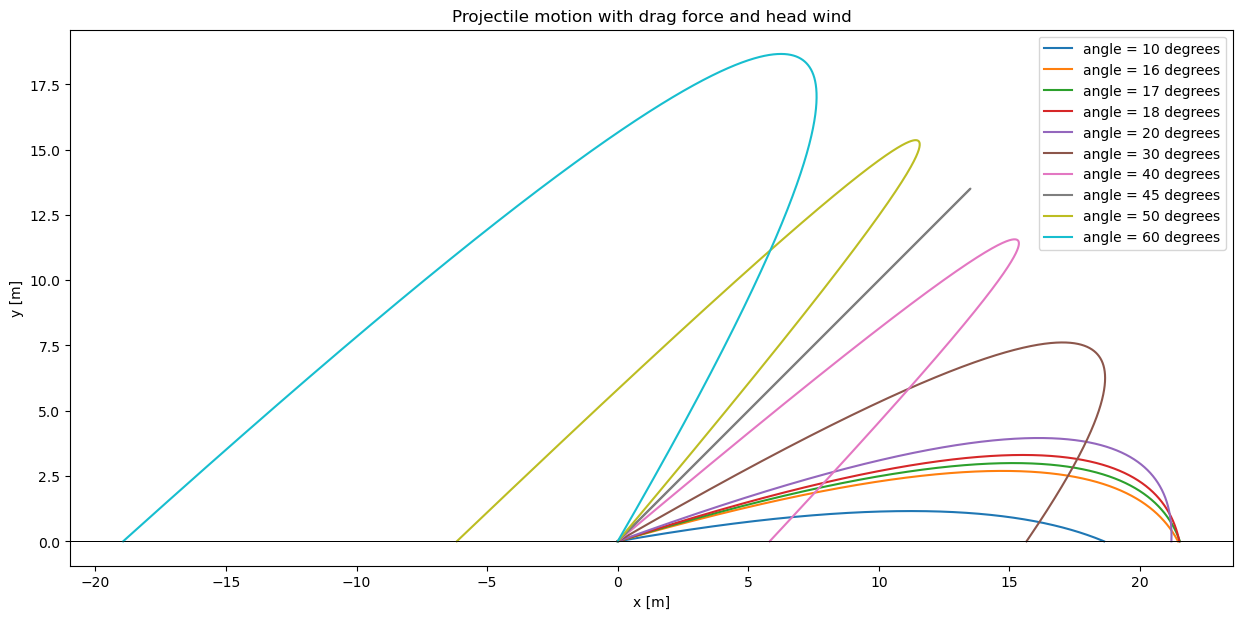

In [19]:
# Projectile motion with drag force and head wind

# Define the number of points
npts = 500000

choice = 1

angles = [10, 16, 17, 18, 20, 30, 40, 45, 50, 60]
dt = [0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001]

fig, axis = plt.subplots(1, 1, figsize=(15, 15))

for i in range(len(angles)):

    # Define the parameters
    mass = 1.0
    angle = angles[i] * np.pi / 180.0
    v0 = 30.0
    g = 10.0
    v_wind = 20.0
    k = 0.5

    # Initialize the arrays
    time = np.zeros(npts)
    x = np.zeros(npts)
    y = np.zeros(npts)
    vx = np.zeros(npts)
    vy = np.zeros(npts)
    ax = np.zeros(npts)
    ay = np.zeros(npts)


    # Define the acceleration function
    def a(vx, vy):
        global g
        ax = -k / mass * v_wind - k / mass * vx
        ay = -g - k / mass * vy
        return ax, ay


    # Set the initial conditions
    time[0] = 0.0
    x[0] = 0.0
    y[0] = 0.0
    vx[0] = v0 * np.cos(angle)
    vy[0] = v0 * np.sin(angle)
    ax[0], ay[0] = a(vx[0], vy[0])

    # Loop over the time points, until the projectile hits the ground
    for t in range(1, npts):
        # Euler Method

        # update time
        time[t] = time[t - 1] + dt[i]

        # update position
        x[t] = x[t - 1] + vx[t - 1] * dt[i]
        y[t] = y[t - 1] + vy[t - 1] * dt[i]

        # update velocity
        vx[t] = vx[t - 1] + ax[t - 1] * dt[i]
        vy[t] = vy[t - 1] + ay[t - 1] * dt[i]

        # update acceleration
        ax[t], ay[t] = a(vx[t], vy[t])

        # check if the projectile hits the ground
        if y[t] < 0.0:
            print('Angle =', angles[i])
            print('Time of flight =', time[t])
            print('Range =', x[t])
            break

    # Plot the results

    if (choice == 1):
        axis.plot(x[:t], y[:t], label='angle = ' + str(angles[i]) + ' degrees')
    else:
        axis.plot(x[:t], y[:t], label='dt = ' + str(dt[i]) + ' s')

    axis.set_aspect('equal')
    axis.set_xlabel('x [m]')
    axis.set_ylabel('y [m]')
    axis.set_title('Projectile motion with drag force and head wind')

    # draw horizontal line (ground)
    axis.axhline(0, color='black', lw=0.5)

axis.legend()
#axis.set_xlim(21.585,21.590)
#axis.set_ylim(0,0.02)
plt.show()